In [27]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from qiskit.circuit.random import random_circuit
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *
from rco import *
from data_encoders import *


#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Fitting Random Circuits

In [18]:
np.random.seed(42)

n_qubits = 4
depth = 20
circuit = random_circuit(n_qubits, depth)

In [19]:
np.random.seed(42)
rco1 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = 4),
           n_qubits = 4,
           sampler = AverageBit(), 
           optimizer = Adam(lr=0.1),
           divisor = 5, 
           shots = 0,
           tol = 1e-2,
           warm_start=False)

In [20]:
np.random.seed(42)
rco1.fit(circuit)

0/5 iterations
1: 0.8919445129338531
2: 0.7986582502564659
3: 0.6889383709015295
4: 0.606794986255254
5: 0.5608717203308059
6: 0.5214435683490755
7: 0.46406202701374155
8: 0.3828112291054383
9: 0.28667494554478634
10: 0.1953705085741666
11: 0.12935003644086396
12: 0.09628237019658681
13: 0.08633961279200475
14: 0.08238238476659288
15: 0.07336726951098582
16: 0.05921421856723097
17: 0.04564165590999858
18: 0.03704531020363511
19: 0.03348200045928584
20: 0.03240028959778585
21: 0.031479433183124295
22: 0.029824567873028895
23: 0.027436325010773976
24: 0.024051826490992023
25: 0.01935963512491301
26: 0.014346223807068736
27: 0.011087198377243035
28: 0.010904491636166913
29: 0.013123573610638872
30: 0.015609550742913925
31: 0.016360473889327154
32: 0.014680481645485188
33: 0.011355335157087976
34: 0.008070975046748918
1/5 iterations
1: 0.8921158434725559
2: 0.8202049692235236
3: 0.7773077998767732
4: 0.7646253904601668
5: 0.7552998791080037
6: 0.7241728047438507
7: 0.6670639198693756
8: 0.

115: 0.009695073965384049
5/5 iterations


In [21]:
rco1.predict(circuit)

0.05945181303939917

In [30]:
np.random.seed(42)
rco2 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = 4),
           n_qubits = 4,
           sampler = ZeroBit(), 
           optimizer = Adam(lr=0.1),
           divisor = 5, 
           shots = 0,
           tol = 1e-2,
           warm_start=False)

In [31]:
np.random.seed(42)
rco2.fit(circuit)

0/5 iterations
1: 0.845712513159976
2: 0.7236208723620162
3: 0.6003891241723196
4: 0.4971431411989291
5: 0.43691007434533136
6: 0.40762455915124196
7: 0.3832781670307702
8: 0.3562196501371535
9: 0.330601721323852
10: 0.2999047492890299
11: 0.25680948888239874
12: 0.20367773606411788
13: 0.15012799378739028
14: 0.10609953582657083
15: 0.0739949135915059
16: 0.051003601427701994
17: 0.035844236365703
18: 0.029993119518144984
19: 0.03360765540262911
20: 0.04448924405353105
21: 0.05762776381404511
22: 0.06507345709256884
23: 0.06158761139800417
24: 0.04963295609451712
25: 0.03673476344067694
26: 0.02847380487294504
27: 0.025087792951539956
28: 0.023718443911055154
29: 0.021475589389850835
30: 0.01765501563105898
31: 0.01422127097997894
32: 0.012947168687588828
33: 0.012767051117817063
34: 0.0115020242253141
35: 0.00885173685569185
1/5 iterations
1: 0.8435972489264348
2: 0.7158586393613271
3: 0.610753390680593
4: 0.523430343928391
5: 0.458981395463412
6: 0.4100803472517158
7: 0.359748996271

KeyboardInterrupt: 

In [ ]:
rco2.predict(circuit)

### Fitting Amplitude Encoding

#### 4 qubits

In [32]:
np.random.seed(42)
x = np.random.normal(0, 1, (16))
x = x/np.sqrt(np.sum(x**2))

storage = qk.QuantumRegister(4)
circuit = qk.QuantumCircuit(storage)
circuit = amplitude_encoding(x, circuit, storage)
print(len(circuit))

79


In [33]:
np.random.seed(42)
rco_amplitude_encoder1 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = 4),
                       n_qubits = 4,
                       sampler = AverageBit(), 
                       optimizer = Adam(lr=0.1),
                       divisor = 1, 
                       shots = 0,
                       tol = 1e-2,
                       warm_start=False)

In [34]:
rco_amplitude_encoder1.fit(circuit)

0/1 iterations
1: 0.9603882490576132
2: 0.9441247401519313
3: 0.9157310567295345
4: 0.8770898304154527
5: 0.8256200420233458
6: 0.7558654623694343
7: 0.6751390230540429
8: 0.6001222697396994
9: 0.5440472807571373
10: 0.5079094950273959
11: 0.482347483071597
12: 0.4619824535113066
13: 0.44666552476310983
14: 0.4348642084634122
15: 0.4235778429808764
16: 0.41184069797311995
17: 0.3996081193548886
18: 0.3856529528836671
19: 0.36886639311171454
20: 0.3489806193129298
21: 0.325627577914398
22: 0.29847246624226953
23: 0.2676849989517023
24: 0.23445236009788872
25: 0.20160796821432014
26: 0.17335056448754038
27: 0.1533703947097923
28: 0.14227465735303468
29: 0.13705168122859568
30: 0.13391939247791762
31: 0.1317554281269544
32: 0.13188345655277367
33: 0.1344912106413022
34: 0.1366046292873755
35: 0.1349419477336976
36: 0.12942683528648258
37: 0.12223267551990746
38: 0.11499548522896252
39: 0.10847794177385472
40: 0.10348714642290557
41: 0.10036170316663973
42: 0.09828182084466852
43: 0.096195

In [36]:
rco_amplitude_encoder1.predict(circuit)

0.009818955377436045

In [35]:
np.random.seed(42)
rco_amplitude_encoder2 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = 4),
                       n_qubits = 4,
                       sampler = ZeroBit(), 
                       optimizer = Adam(lr=0.1),
                       divisor = 1, 
                       shots = 0,
                       tol = 1e-2,
                       warm_start=False)

In [37]:
rco_amplitude_encoder2.fit(circuit)

0/1 iterations
1: 0.8115735024497696
2: 0.6449341019360215
3: 0.5447798373375222
4: 0.4858258341880286
5: 0.42161469538554186
6: 0.37001791333284084
7: 0.3562085324751255
8: 0.3676079648361358
9: 0.3664348941123322
10: 0.33901373317738726
11: 0.2996874804824572
12: 0.2723401070078455
13: 0.26629260028706636
14: 0.26881432798194616
15: 0.26665956294919047
16: 0.25945593939909806
17: 0.250913836715711
18: 0.23909471788756154
19: 0.2203789741708695
20: 0.19733420634272258
21: 0.17671304091955653
22: 0.16223368427532725
23: 0.15230806340091707
24: 0.14407006382993526
25: 0.13652963012294872
26: 0.1295666157969234
27: 0.12309961263247982
28: 0.11638534031082581
29: 0.10827518898915756
30: 0.0985365377613886
31: 0.08790604976515948
32: 0.07730045671319863
33: 0.06724930740433077
34: 0.05844354075000602
35: 0.05210975120857875
36: 0.04884371965825396
37: 0.04743439544465189
38: 0.04558563035614671
39: 0.042126287852574884
40: 0.03794550148655784
41: 0.03447924952963488
42: 0.03201178472835275

In [38]:
rco_amplitude_encoder2.predict(circuit)

0.009912532455087941

#### 5 qubits

In [ ]:
np.random.seed(42)
x = np.random.normal(0, 1, (2**4))
x = x/np.sqrt(np.sum(x**2))

storage = qk.QuantumRegister(4, name="storage")
circuit = qk.QuantumCircuit(storage)
circuit = amplitude_encoding(x, circuit, storage)
print(len(circuit))
print(x)

In [ ]:
np.random.seed(42)
rco_amplitude_encoder3 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = 5), 
                       sampler = AverageBit(), 
                       optimizer = Adam(lr=0.1),
                       divisor = 1, 
                       shots = 100000,
                       tol = 1e-3,
                       warm_start=False)

In [ ]:
rco_amplitude_encoder3.fit(circuit)

In [ ]:
np.random.seed(42)
rco_amplitude_encoder4 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = 5), 
                       sampler = AverageBit(), 
                       optimizer = Adam(lr=0.1),
                       divisor = 5, 
                       shots = 100000,
                       tol = 1e-3,
                       warm_start=False)

In [ ]:
rco_amplitude_encoder4.fit(circuit)

### Analyse Gradient

In [43]:
np.random.seed(45)

grads_average_locals = []
grads_average_global = []

for i in tqdm(range(2,9)):  
    x = np.random.normal(0, 1, (2**i))
    x = x/np.sqrt(np.sum(x**2))

    storage = qk.QuantumRegister(i)
    circuit = qk.QuantumCircuit(storage)
    circuit = amplitude_encoding(x, circuit, storage)
    
    rco1 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = i),
               n_qubits=i,
               sampler = AverageBit(), 
               optimizer = Adam(lr=0.1),
               divisor = 1, 
               shots = 0,
               tol = 1e-3,
               warm_start=False)
    
    rco2 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = i),
               n_qubits=i,
               sampler = ZeroBit(), 
               optimizer = Adam(lr=0.1),
               divisor = 1, 
               shots = 0,
               tol = 1e-3,
               warm_start=False)
    
    grads1 = rco1.gradient(circuit, rco1.params[0, :])
    grads2 = rco2.gradient(circuit, rco2.params[0, :])
    
    grads_average_locals.append(np.mean(np.abs(grads1)))
    grads_average_global.append(np.mean(np.abs(grads2)))
    

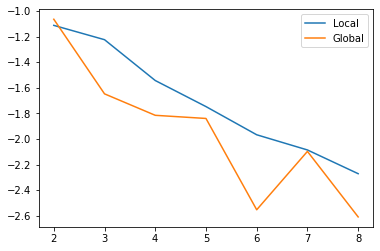

In [44]:
y1 = np.log10(np.array(grads_average_locals))
y2 = np.log10(np.array(grads_average_global))

plt.plot(list(range(2,9)), y1)
plt.plot(list(range(2,9)), y2)
plt.legend(["Local", "Global"])
plt.show()